In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /nethome/bdevnani3/anaconda3/envs/p3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [3]:
# Flowers
d = {"1": 61.758241758241766, "2": 78.31501831501832, "4": 86.44688644688645, "8": 91.97802197802199, "16": 95.77533577533578, "-1": 97.55799755799754}
avg_class_len = 64.2
zs_performance = 64.83
lp_performance = 97.5
title = "Flowers"

In [13]:
# CIFAR-100
d = {"1": 30.264, "2": 40.251, "4": 49.12199999999999, "8": 56.355, "16": 61.41799999999999, "-1": 79.03299999999999}
avg_class_len = 600
zs_performance = 63.19
lp_performance = 80.15
title = "Cifar-100"

In [6]:
# Pets
d = {"1": 35.57645134914146, "2": 50.35159443990189, "4": 63.23793949304987, "8": 74.79694739711093, "16": 81.18015808122105, "-1": 87.70782229490327}
avg_class_len = 50
zs_performance = 89.97
lp_performance = d["-1"]
title = "Pets"

In [24]:
# Food
d = {"1": 37.95709570957096, "2": 52.13069306930693, "4": 64.21914191419143, "8": 71.47524752475249, "16": 76.0957095709571, "-1": 84.158}
avg_class_len = 750
zs_performance = 79
lp_performance = d["-1"]
title = "Food101"

[[ 1.          3.40995889]
 [ 2.          3.69513485]
 [ 4.          3.894307  ]
 [ 8.          4.03167097]
 [16.          4.11770295]
 [-1.          4.36986549]]


<ipython-input-16-f6277edfed91>:7: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)+c


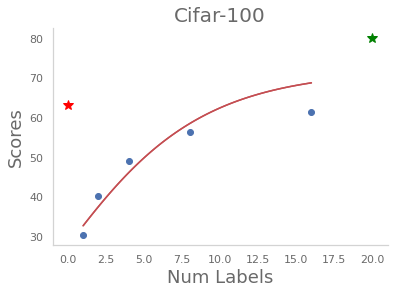

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

def func(x, a, b,c):
    return a*np.exp(-b*x)+c

points = np.array([(int(k),np.log(v)) for k,v in d.items()])
print(points)
# get x and y vectors
x = points[:,0]
y = points[:,1]

x[-1] = avg_class_len

# calculate polynomial
popt, pcov  = curve_fit(func,  x,  y)

plt.plot(x[:-1],np.exp(y)[:-1],'o')
x_new = np.linspace(x[0], x[-2], 100)
plt.title(title)
plt.xlabel('Num Labels')
plt.ylabel('Scores')
plt.plot(x_new, np.exp(func(x_new, *popt)), 'r-')
plt.plot(x_new, np.exp(func(x_new, *popt)), 'r-')

plt.plot([0], [zs_performance], marker='*', markersize=10, color="red")
plt.plot([20], [lp_performance], marker='*', markersize=10, color="green")
plt.show()

In [23]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

x_all = np.linspace(0,avg_class_len+1,int(avg_class_len*100))

y_all = func(x_all, *popt)

log_zsp = np.log(zs_performance)
log_lpp = np.log(lp_performance)

ind = find_nearest(y_all,log_zsp)
print("Avg classes to match zero shot", x_all[ind])
ind = find_nearest(y_all,log_lpp)
print("Avg classes to match linear probe", x_all[ind])


Avg classes to match zero shot 20.848037973839652
Avg classes to match linear probe 79.63710182802438


In [ ]:
line1_x = list(d['cross_entropy'].keys())
line1_y = [d['cross_entropy'][v] for v in line1_x]

line1_x[-1] = 50 

line2_x = list(d['clip'].keys())
line2_y = [d['clip'][v] for v in line2_x]

line2_x[-1] = 50 

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit


plt.title(title)
plt.xlabel('Num Labels')
plt.ylabel('Accuracy')
plt.plot(line1_x, line1_y, 'r-', label="cross_entropy")
plt.plot(line2_x, line2_y, 'b-', label="clip")
# plt.plot([0], [zs_performance], marker='*', markersize=10, color="orange", label="zs_performance")
plt.legend()
plt.show()